In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

from statannotations.Annotator import Annotator

import json

In [36]:
# sns.set(rc={'text.usetex' : True})
sns.set_style("whitegrid")

In [75]:
plt.rcParams["font.family"] = "Times New Roman"
sns.set(rc={'text.usetex' : True})
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [121]:
cartography_df.columns

Index(['Aindex', 'Mindex', 'text', 'label_0_mean', 'label_0_std',
       'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last', 'label',
       'pred', 'agreement_level', 'annotator_id', 'comment_id',
       'majority_label', 'confidence', 'variability', 'correctness',
       'is_correct', 'agreement_factor', 'agreement_factor_rd',
       'disagrees_with_majority', 'majority_confidence',
       'majority_variability', 'label_text'],
      dtype='object')

In [2]:
cartography_df = pd.read_csv('./results/full_cartography.csv')
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
0,0,519,"<user> <user> Sorry, which old man?",0.909335,0.087134,0.977597,0.090665,0.087134,0.022403,0,...,0,0.909335,0.087134,0.977597,True,1.0,1.0,False,0.960451,0.046082
1,4,519,"<user> <user> Sorry, which old man?",0.935822,0.077746,0.998418,0.064178,0.077746,0.001582,0,...,0,0.935822,0.077746,0.998418,True,1.0,1.0,False,0.960451,0.046082
2,158,519,"<user> <user> Sorry, which old man?",0.964263,0.048459,0.996545,0.035737,0.048459,0.003455,0,...,0,0.964263,0.048459,0.996545,True,1.0,1.0,False,0.960451,0.046082
3,303,519,"<user> <user> Sorry, which old man?",0.982817,0.014302,0.997595,0.017183,0.014302,0.002405,0,...,0,0.982817,0.014302,0.997595,True,1.0,1.0,False,0.960451,0.046082
4,402,519,"<user> <user> Sorry, which old man?",0.949519,0.093693,0.997699,0.050481,0.093693,0.002301,0,...,0,0.949519,0.093693,0.997699,True,1.0,1.0,False,0.960451,0.046082


In [3]:
both_votes_df = cartography_df[cartography_df['agreement_factor'] < 1.0].copy()
both_votes_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
10,0,679,<user> <user> <user> President Trump spent his...,0.296290,0.195163,0.276914,0.703710,0.195163,0.723086,1,...,1,0.703710,0.195163,0.723086,True,0.6,0.6,False,0.805419,0.236047
11,2,679,<user> <user> <user> President Trump spent his...,0.661447,0.112500,0.637540,0.338553,0.112500,0.362460,0,...,1,0.661447,0.112500,0.637540,True,0.6,0.6,True,0.805419,0.236047
12,7,679,<user> <user> <user> President Trump spent his...,0.252828,0.141591,0.111033,0.747172,0.141591,0.888967,1,...,1,0.747172,0.141591,0.888967,True,0.6,0.6,False,0.805419,0.236047
13,22,679,<user> <user> <user> President Trump spent his...,0.637383,0.143021,0.733126,0.362617,0.143021,0.266874,1,...,1,0.362617,0.143021,0.266874,False,0.6,0.6,False,0.805419,0.236047
14,148,679,<user> <user> <user> President Trump spent his...,0.693151,0.083711,0.652475,0.306849,0.083711,0.347525,0,...,1,0.693151,0.083711,0.652475,True,0.6,0.6,True,0.805419,0.236047


In [4]:
cartography_df['Mindex'].nunique()

8357

In [5]:
both_votes_df[both_votes_df['Mindex'] == 679][['confidence', 'text', 'Aindex', 'pred', 'label']].values

array([[0.7037100851535797,
        '<user> <user> <user> President Trump spent his life working hard to make things great for his Family &amp; gave it up to work hard for ALL AMERICANS. joe-kickback-biden bullshitted his way into public office so he could use his influence to enrich himself &amp; his family at the American tax payers expense!',
        0, 1, 1],
       [0.6614466428756713,
        '<user> <user> <user> President Trump spent his life working hard to make things great for his Family &amp; gave it up to work hard for ALL AMERICANS. joe-kickback-biden bullshitted his way into public office so he could use his influence to enrich himself &amp; his family at the American tax payers expense!',
        2, 0, 0],
       [0.747172474861145,
        '<user> <user> <user> President Trump spent his life working hard to make things great for his Family &amp; gave it up to work hard for ALL AMERICANS. joe-kickback-biden bullshitted his way into public office so he could use his infl

In [6]:
both_votes_df[both_votes_df['Aindex'] == 0][['confidence', 'text', 'pred', 'label']].values

array([[0.7037100851535797,
        '<user> <user> <user> President Trump spent his life working hard to make things great for his Family &amp; gave it up to work hard for ALL AMERICANS. joe-kickback-biden bullshitted his way into public office so he could use his influence to enrich himself &amp; his family at the American tax payers expense!',
        1, 1],
       [0.8815631747245789,
        '<user> <user> Lol. Y’all’s are probably one of them. Proud Boys are a racist neo nazi dangerous white Supremacist group. I’m done cause it’s obvious you are clueless. Watch their videos and read their quotes.',
        1, 1],
       [0.3139286592602729,
        '<user> #sleepingjoe cry no more 😂😂😂 you so awful😂', 0, 1],
       [0.5127638399600982,
        '<user> <user> <user> If you classify restraint as calling your opponent a clown a racist and telling him to shut up sure.',
        0, 0],
       [0.7718652427196503,
        'Bye Martha McSally!   I always found her unbelievably smug and sp

In [7]:
grouped_data_label_base = both_votes_df.groupby(['Mindex', 'label']).agg({'confidence': 'mean'}).reset_index()
grouped_data_label = grouped_data_label_base.pivot(index='Mindex', columns='label', values='confidence').reset_index()
grouped_data_label.rename(columns={0: 'label_0', 1: 'label_1', 'label': 'index'}, inplace=True)
grouped_data_label.head()

label,Mindex,label_0,label_1
0,2,0.757111,0.020271
1,5,0.749879,0.541777
2,8,0.794425,0.177775
3,13,0.504937,0.745088
4,15,0.606738,0.557554


In [8]:
count_column = both_votes_df.groupby('Mindex').size().reset_index(name='count')
majority_confidence_column = cartography_df[['Mindex', 'majority_confidence']].groupby('Mindex').agg('first')
grouped_data_label = grouped_data_label.merge(majority_confidence_column, on='Mindex')
grouped_data_label = grouped_data_label.merge(count_column, on='Mindex')

In [9]:
grouped_data_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4857 entries, 0 to 4856
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mindex               4857 non-null   int64  
 1   label_0              4857 non-null   float64
 2   label_1              4857 non-null   float64
 3   majority_confidence  4857 non-null   float64
 4   count                4857 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 227.7 KB


In [10]:
grouped_data_label.head()

,Mindex,label_0,label_1,majority_confidence,count
0,2,0.757111,0.020271,0.910781,5
1,5,0.749879,0.541777,0.634483,5
2,8,0.794425,0.177775,0.928253,5
3,13,0.504937,0.745088,0.677012,5
4,15,0.606738,0.557554,0.743063,5


In [11]:
both_mindex_values = grouped_data_label[(grouped_data_label['label_0'] > 0.5) & (grouped_data_label['label_1'] > 0.5)]['Mindex'].values
only_0_mindex_values = grouped_data_label[(grouped_data_label['label_0'] > 0.5) & (grouped_data_label['label_1'] <= 0.5)]['Mindex'].values
only_1_mindex_values = grouped_data_label[(grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] > 0.5)]['Mindex'].values
none_mindex_values = grouped_data_label[(grouped_data_label['label_0'] <= 0.5) & (grouped_data_label['label_1'] <= 0.5)]['Mindex'].values

grouped_data_label['group'] = 0
grouped_data_label.loc[grouped_data_label['Mindex'].isin(both_mindex_values), 'group'] = 'All Labels > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(only_0_mindex_values), 'group'] = '1 Label > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(only_1_mindex_values), 'group'] = '1 Label > 0.5'
grouped_data_label.loc[grouped_data_label['Mindex'].isin(none_mindex_values), 'group'] = '0 Labels > 0.5'

<Axes: xlabel='group', ylabel='count'>

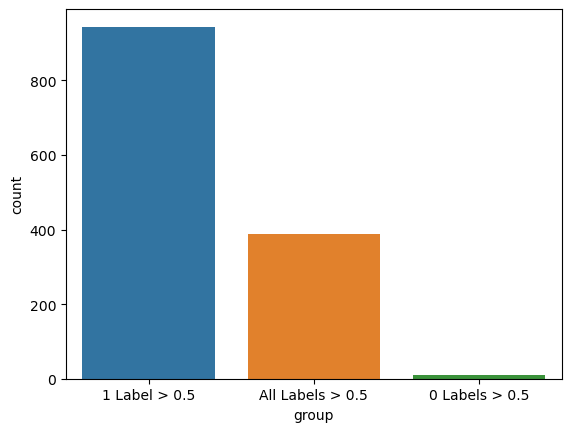

In [12]:
temp_df = grouped_data_label[grouped_data_label['majority_confidence']> 0.9]
sns.countplot(x=temp_df['group'], order=temp_df['group'].value_counts().index)

In [13]:
grouped_data_label_base.head()

,Mindex,label,confidence
0,2,0,0.757111
1,2,1,0.020271
2,5,0,0.749879
3,5,1,0.541777
4,8,0,0.794425


In [14]:
grouped_data_label[grouped_data_label['group'] == 'none_greater']['Mindex'].unique()

array([], dtype=int64)

# Final plotting

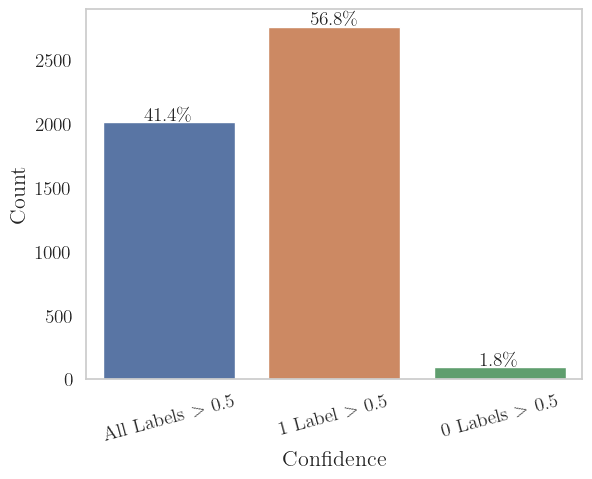

In [98]:
ax = sns.countplot(x=grouped_data_label['group'], order=['All Labels > 0.5', '1 Label > 0.5', '0 Labels > 0.5'])
ax.grid(False)

# plt.title('Confidence of Samples with Disagreement in Label', fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=16)
plt.gca().set_xlabel('Confidence', fontsize=16)

plt.yticks(fontsize=14)

plt.xticks([0, 1, 2], [r'All Labels \textgreater \ 0.5', r'1 Label \textgreater \ 0.5', r'0 Labels \textgreater \ 0.5'], fontsize=14, rotation=15)

total = grouped_data_label["group"].value_counts().sum()  # Total number of data points
for p in ax.patches:
    percentage = '{:.1f}\%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20  # Adjust the vertical position of the label
    ax.text(x, y, percentage, ha="center", fontsize=14)

plt.savefig("./plots/disco/ag2disagree_group_count.pdf", dpi=600, bbox_inches='tight')

In [20]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'not offensive', 1: 'offensive'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.001e+08


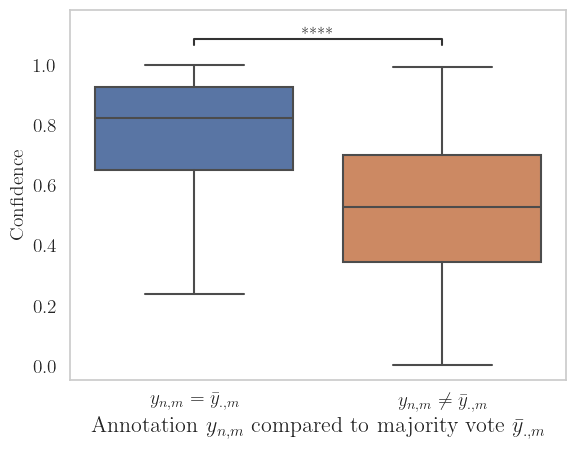

In [62]:
ax = sns.boxplot(data=cartography_df, x="disagrees_with_majority", y="confidence", showfliers=False)

pairs=[ (False, True)]


annotator = Annotator(ax, pairs, data=cartography_df, x="disagrees_with_majority", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

# plt.title('Samples with low confidence (<0.5) in Single-GL model', fontsize=16)
plt.xticks([0, 1], [r'$y_{n,m} = \bar{{y}}_{.,m}$', r'$y_{n,m} \neq \bar{{y}}_{.,m}$'], fontsize=14)

ax.grid(False)

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel(r"Annotation $y_{n,m}$ compared to majority vote $\bar{{y}}_{.,m}$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("./plots/disco/ag2disagree_disagree_vs_conf.pdf", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:8.928e-125 U_stat=6.073e+07
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=5.069e+07
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.459e+07


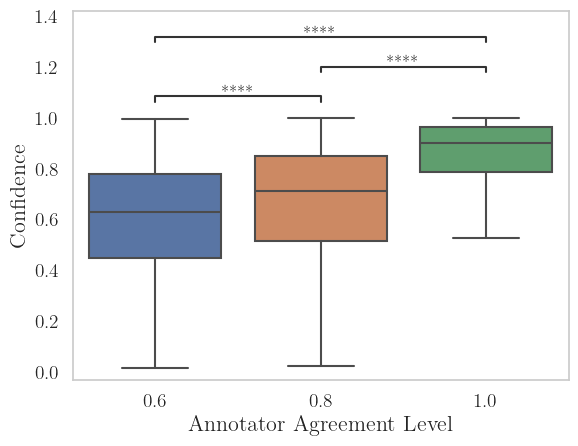

In [65]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)


pairs=[ (0.6, 1.0), (0.6, 0.8), (0.8, 1.0)]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()
ax.grid(False)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=16)
plt.gca().set_xlabel('Annotator Agreement Level', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(title = 'Label', loc='lower right')
plt.savefig("./plots/disco/ag2disagree_agr_factor_vs_conf.pdf", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.001e+08


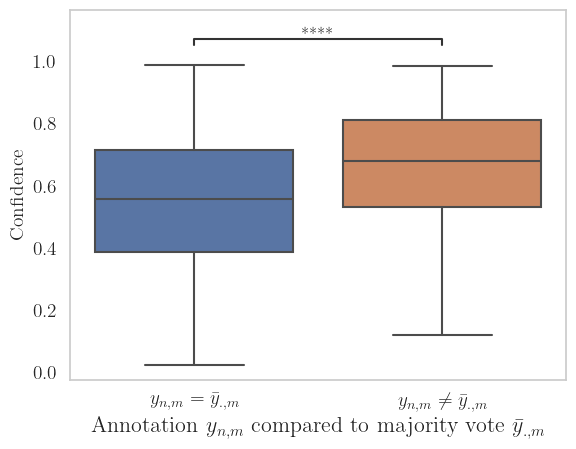

In [63]:
ax = sns.boxplot(data=cartography_df[cartography_df['majority_confidence']<0.5], x="disagrees_with_majority", y="confidence", showfliers=False)

pairs=[ (False, True)]


annotator = Annotator(ax, pairs, data=cartography_df, x="disagrees_with_majority", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

# plt.title('Samples with low confidence (<0.5) in Single-GL model', fontsize=16)
plt.xticks([0, 1], [r'$y_{n,m} = \bar{{y}}_{.,m}$', r'$y_{n,m} \neq \bar{{y}}_{.,m}$'], fontsize=14)

ax.grid(False)

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel(r"Annotation $y_{n,m}$ compared to majority vote $\bar{{y}}_{.,m}$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("./plots/disco/ag2disagree_low_conf_mjr_disagree_vs_conf.pdf", dpi=600, bbox_inches='tight')

In [4]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.4646721787900789, pvalue=0.0)

In [6]:
cartography_df[(cartography_df['confidence'] < 0.2) & (cartography_df['majority_confidence'] < 0.2)][['Mindex', 'text', 'label', 'majority_label']].values[:10]

array([[7540,
        '<user> <user> I see a lot of proud violent screaming leftists and liberals in black face passing racially motivated crime bills. YOU AINT BLACK. Biden should be condemning his supporters.',
        1, 0],
       [687,
        '<user> IM LEAVING AMERICA! SCREW THIS COUNTRY! I’m moving to Mexico where they actually run a civilised and balanced nation for its people.',
        0, 1],
       [3295, 'Ahahahaha. Always someone profiting off shit', 0, 0],
       [3295, 'Ahahahaha. Always someone profiting off shit', 0, 0],
       [3328,
        'Imagine voting for Trump 🤡 #TrumpVsBiden2020 #JoeBiden #Trump #Elections2020',
        1, 1],
       [6391,
        '<user> <user> <user> To whom it may concern,  Due to your #unscientific #MandatoryMask rule, I will no longer be shopping at #WalMart ever again.  I have not &amp; WILL not wear a mask!  #BoycottWalMart  #MandatoryMaskRuleFarce  <url>',
        1, 1],
       [7039,
        '<user> <user> morally weak how? trump co

In [7]:
cartography_df[cartography_df['Mindex'] == 7540]

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,...,majority_label,confidence,variability,correctness,is_correct,agreement_factor,agreement_factor_rd,disagrees_with_majority,majority_confidence,majority_variability
5875,2,7540,<user> <user> I see a lot of proud violent scr...,0.592491,0.174001,0.786536,0.407509,0.174001,0.213463,0,...,0,0.592491,0.174001,0.786536,True,0.6,0.6,False,0.194391,0.145072
5876,75,7540,<user> <user> I see a lot of proud violent scr...,0.668753,0.136192,0.737021,0.331247,0.136192,0.262979,1,...,0,0.331247,0.136192,0.262979,False,0.6,0.6,True,0.194391,0.145072
5877,125,7540,<user> <user> I see a lot of proud violent scr...,0.824818,0.056430,0.895264,0.175182,0.056430,0.104736,1,...,0,0.175182,0.056430,0.104736,False,0.6,0.6,True,0.194391,0.145072
5878,186,7540,<user> <user> I see a lot of proud violent scr...,0.350184,0.195773,0.417642,0.649816,0.195773,0.582358,0,...,0,0.350184,0.195773,0.417642,False,0.6,0.6,False,0.194391,0.145072
5879,227,7540,<user> <user> I see a lot of proud violent scr...,0.602725,0.135955,0.536900,0.397275,0.135955,0.463100,0,...,0,0.602725,0.135955,0.536900,True,0.6,0.6,False,0.194391,0.145072


In [9]:
cartography_df[cartography_df['Aindex']==125].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 2383 to 40065
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   428 non-null    int64  
 1   Mindex                   428 non-null    int64  
 2   text                     428 non-null    object 
 3   label_0_mean             428 non-null    float64
 4   label_0_std              428 non-null    float64
 5   label_0_last             428 non-null    float64
 6   label_1_mean             428 non-null    float64
 7   label_1_std              428 non-null    float64
 8   label_1_last             428 non-null    float64
 9   label                    428 non-null    int64  
 10  pred                     428 non-null    int64  
 11  agreement_level          428 non-null    object 
 12  annotator_id             428 non-null    object 
 13  comment_id               428 non-null    object 
 14  majority_label       

In [10]:
cartography_df[cartography_df['Aindex']==125]['label'].value_counts()

0    352
1     76
Name: label, dtype: int64

<Axes: >

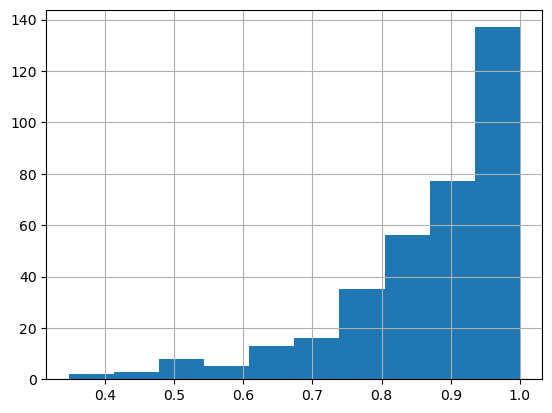

In [12]:
cartography_df[(cartography_df['Aindex']==125) & (cartography_df['label']==0)]['confidence'].hist()

<Axes: >

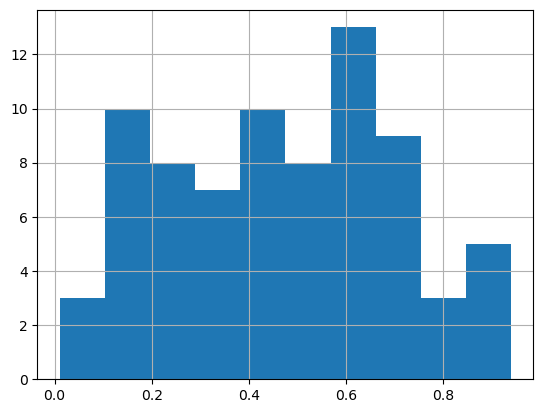

In [13]:
cartography_df[(cartography_df['Aindex']==125) & (cartography_df['label']==1)]['confidence'].hist()

In [39]:
max_conf_df = cartography_df.groupby('Mindex').agg({'confidence': 'max', 'majority_confidence': 'first'})
max_conf_df.head()

,confidence,majority_confidence
Mindex,,
2,0.932431,0.910781
3,0.978702,0.964216
5,0.805465,0.634483
6,0.934685,0.948924
7,0.958109,0.975536


/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/abhishekanand/miniforge3/envs/py11-env/lib/python3.11/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

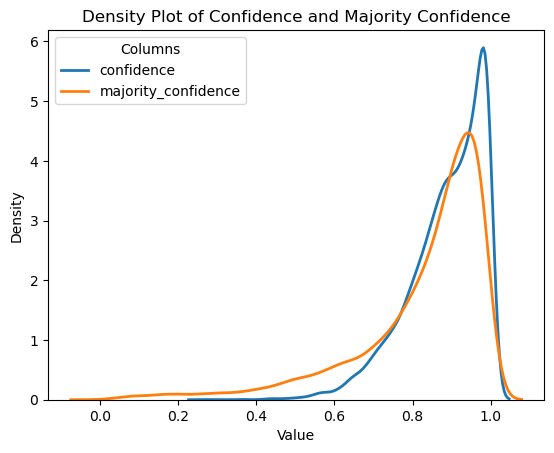

In [48]:
sns.distplot(max_conf_df['confidence'], hist = False, kde = True, kde_kws = {'linewidth': 2}, label = 'confidence')
sns.distplot(max_conf_df['majority_confidence'], hist = False, kde = True, kde_kws = {'linewidth': 2}, label = 'majority_confidence')
plt.legend(prop={'size': 10}, title = 'Columns')
plt.title('Density Plot of Confidence and Majority Confidence')
plt.xlabel('Value')
plt.ylabel('Density')

In [54]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.4646721787900789, pvalue=0.0)

In [83]:
grouped_data_label['group'].value_counts().sum()

4857

In [84]:
grouped_data_label['group'].value_counts()

1 Label > 0.5       2760
All Labels > 0.5    2009
0 Labels > 0.5        88
Name: group, dtype: int64

In [102]:
labels_no_conf_indices = grouped_data_label[grouped_data_label['group']=='0 Labels > 0.5']['Mindex'].values

In [122]:
cartography_df[cartography_df['Mindex'].isin(labels_no_conf_indices)][['Aindex',	'Mindex',	'text', 'label', 'majority_label', 'confidence', 'majority_confidence', 'majority_variability']].head(10)

,Aindex,Mindex,text,label,majority_label,confidence,majority_confidence,majority_variability
685,1,2674,When u are ready to listen I'll tell u coronav...,0,1,0.271449,0.844648,0.145159
686,6,2674,When u are ready to listen I'll tell u coronav...,1,1,0.544188,0.844648,0.145159
687,102,2674,When u are ready to listen I'll tell u coronav...,1,1,0.526440,0.844648,0.145159
688,106,2674,When u are ready to listen I'll tell u coronav...,1,1,0.356666,0.844648,0.145159
689,557,2674,When u are ready to listen I'll tell u coronav...,1,1,0.564284,0.844648,0.145159
960,1,4023,<user> <user> Report: Vikings are activating t...,0,1,0.323235,0.916792,0.101023
961,7,4023,<user> <user> Report: Vikings are activating t...,1,1,0.644345,0.916792,0.101023
962,8,4023,<user> <user> Report: Vikings are activating t...,1,1,0.451080,0.916792,0.101023
963,54,4023,<user> <user> Report: Vikings are activating t...,1,1,0.409764,0.916792,0.101023
964,69,4023,<user> <user> Report: Vikings are activating t...,1,1,0.292643,0.916792,0.101023


In [114]:
cartography_df[cartography_df['Aindex'] == 106]['label'].value_counts()

0    122
1     20
Name: label, dtype: int64

In [119]:
cartography_df[cartography_df['Aindex'] == 69]['label'].value_counts()

0    612
1    158
Name: label, dtype: int64

In [128]:
cartography_df[cartography_df['Aindex'] == 1]['label'].value_counts()

0    164
1    156
Name: label, dtype: int64